# Spam Message Classification: Random Forest Pipe Component vs. Support Vector Machine

We can do this kind of supervised machine learning task with the scikit-learn library.

# 1) Data Preprocessing

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
dF = pd.read_csv('../Spam_binary_classification/spam.tsv', sep='\t')

In [90]:
dF.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [91]:
dF.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [92]:
dF.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [93]:
dF.shape
dF.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [94]:
dF['label'].value_counts()/len(dF) ##Very imbalanced dataset.

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [95]:
# How do we balance the dataset?-->
# Could collect more data-> not going to do that
ham = dF[dF['label'] == 'ham']
spam = dF[dF['label'] == 'spam']

In [96]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [97]:
ham = ham.sample(spam.shape[0])

In [98]:
data = ham.append(spam, ignore_index=True)

In [99]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [100]:
data.head()

,label,message,length,punct
0,ham,Yo im right by yo work,22,0
1,ham,Apart from the one i told you about yesterday?,46,1
2,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...,62,5
3,ham,Pls dont restrict her from eating anythin she ...,74,1
4,ham,Turns out my friends are staying for the whole...,146,14


In [101]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


# Histograms- Identifying Differentiating Variable(s)

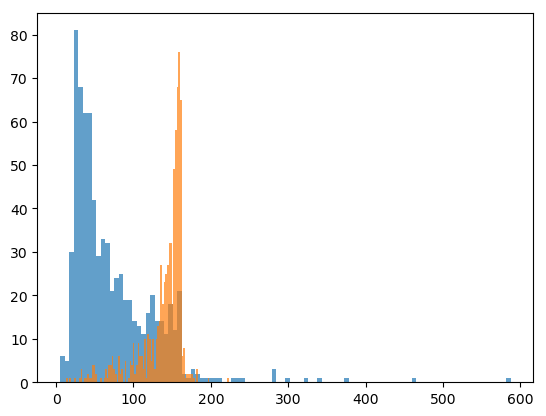

In [102]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.show()

We see that the length is a differentiating variable- longer messages tend to be spam.

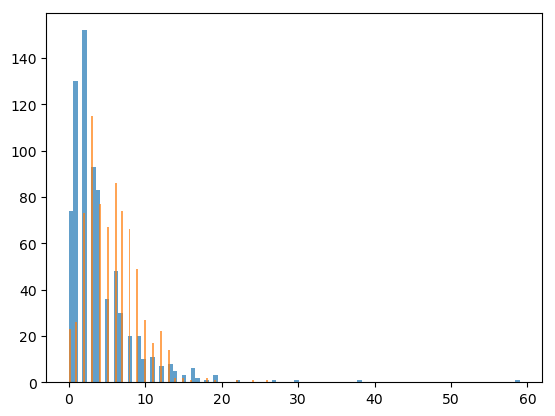

In [103]:
# What about punc? Let's see-->
plt.hist(data[data['label'] == 'ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100, alpha=0.7)
plt.show()
# This isn't a very string differentiating variable.

In [104]:
# Need to create a train-test split to train a model
from sklearn.model_selection import train_test_split
X = data['message']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [105]:
1494 * 0.3 # Should be this split

448.2

In [106]:
X_train.shape, X_test.shape

((1045,), (449,))

# 2) Building the Model (Random Forest)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [108]:
text_classifier = Pipeline([('tfidf', TfidfVectorizer()), ('randforest', RandomForestClassifier())])
text_classifier.fit(X_train, y_train)

/Users/finneassensiba/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
/Users/finneassensiba/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/finneassensiba/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

# 3) Predicting the results (Random Forest)

In [109]:
predictions = text_classifier.predict(X_test)

/Users/finneassensiba/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [110]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions)}')

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       225
        spam       0.98      0.89      0.93       224

   micro avg       0.93      0.93      0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449

Confusion Matrix: 
[[220   5]
 [ 25 199]]


So model is pretty good. We made a pipeline composed of a Term frequency-Inverse document frequency vectorizer, then pushed the vectorized data through a random forest classifier. This resulted in 93% accuracy. How could we do better? -->

# 4) Building the Model (SVM)

In [111]:
from sklearn.svm import SVC

In [112]:
text_classifier2 = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C=100, gamma='auto'))])
text_classifier2.fit(X_train, y_train)

/Users/finneassensiba/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

# 5) Predicting the results (SVM)

In [113]:
svm_predicts = text_classifier2.predict(X_test)

In [114]:
print(classification_report(y_test, svm_predicts))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       225
        spam       0.99      0.88      0.93       224

   micro avg       0.94      0.94      0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



Accuracy rose to 94%- so we got an improved prediction accuracy with the SVM component.

# Testing our models

In [115]:
test1 = ['Hello, you are learning Natural Language Processing.']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations! you won a lottery ticket worth $1 million ! Too claim call on 4466775']

In [116]:
print(text_classifier.predict(test1), text_classifier.predict(test2), text_classifier.predict(test3)) 

['ham'] ['ham'] ['spam']


/Users/finneassensiba/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/finneassensiba/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/Users/finneassensiba/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


Even with just the random forest classifier pipeline, we still get correct predictions with our own input messages. Try it yourself:

In [117]:
test4 = ''
#text_classifier.predict(test4)
#text_classifier2.predict(test4)